In [56]:
# Our imports.
# working with pandas and matplotlib.pyplot.
import pandas as pd 
import matplotlib.pyplot as plt

In [57]:
# Loading the starting data from our datasets, each variable for each dataset.
heart1 =  pd.read_csv('/content/sample_data/heart.csv')
heart2 =  pd.read_csv('/content/sample_data/heart2.csv')

In [58]:
# Merging our two datasets into one list.
heart = [heart1,heart2]
# Make a concat for our new dataset.
heart_df = pd.concat(heart,ignore_index = True)

In [59]:
# Cause the concat of two datasets, there will be chance for duplications,
# so this function will clean all the duplicates.
heart_df = heart_df.drop_duplicates(ignore_index = True)

In [60]:
# Saving our new dataset as csv file.
heart_df.to_csv('heart_df.csv', index=False, encoding='utf-8-sig')

In [61]:
# This function return numbers NaN in each column
nul = heart_df.isna().sum()
# Show the results of column - num_of_Nan.
nul

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
# Here we check for missing data and save it in missing_data to show it as data frame.
#                             column name, num of Nan, column name, num of perc missing. 
missing_data = pd.DataFrame({'total_missing':nul, 'perc_missing': (heart_df.isnull().sum()/82790)*100})
# Showing the missing data.
missing_data

,total_missing,perc_missing
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [73]:
# Showing the full new dataset [5 rows of first table and last].
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [64]:
# This function show us the {count, mean, std, min, 25%, 50%, 75%, max} values for every column.
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
# This function show us an mean of the table by the look of target column.
# by 'target' 0=healthy, 1=sick.
# we can see the mean of every column by look at the target.
heart_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [66]:
# This function convert our columns from dataFrame to list.
column_names = heart_df.columns.tolist()
# Showing our list of column names
column_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

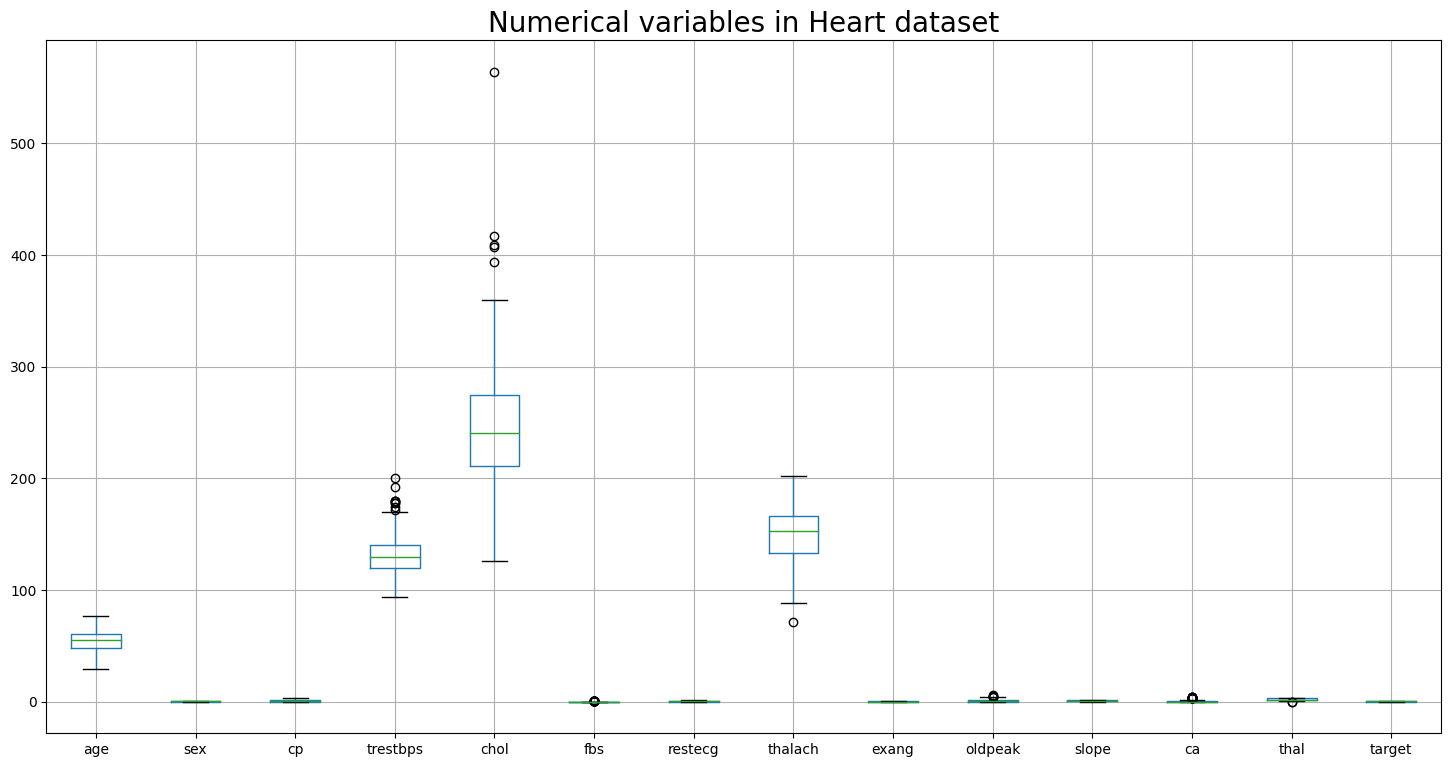

In [74]:
# We see the white point that far away from the outliers in 'chol' column,
# and this is something intresting for us to investigate.
# Need to take care of this column.

# Transfer our columns names.
num_cols = column_names
# Set size for graph.
plt.figure(figsize=(18,9))
# Making a boxplot of our columns names and valuse.
heart_df[num_cols].boxplot()
# Set title for this graph.
plt.title("Numerical variables in Heart dataset", fontsize=20)
# Show it on screen.
plt.show()

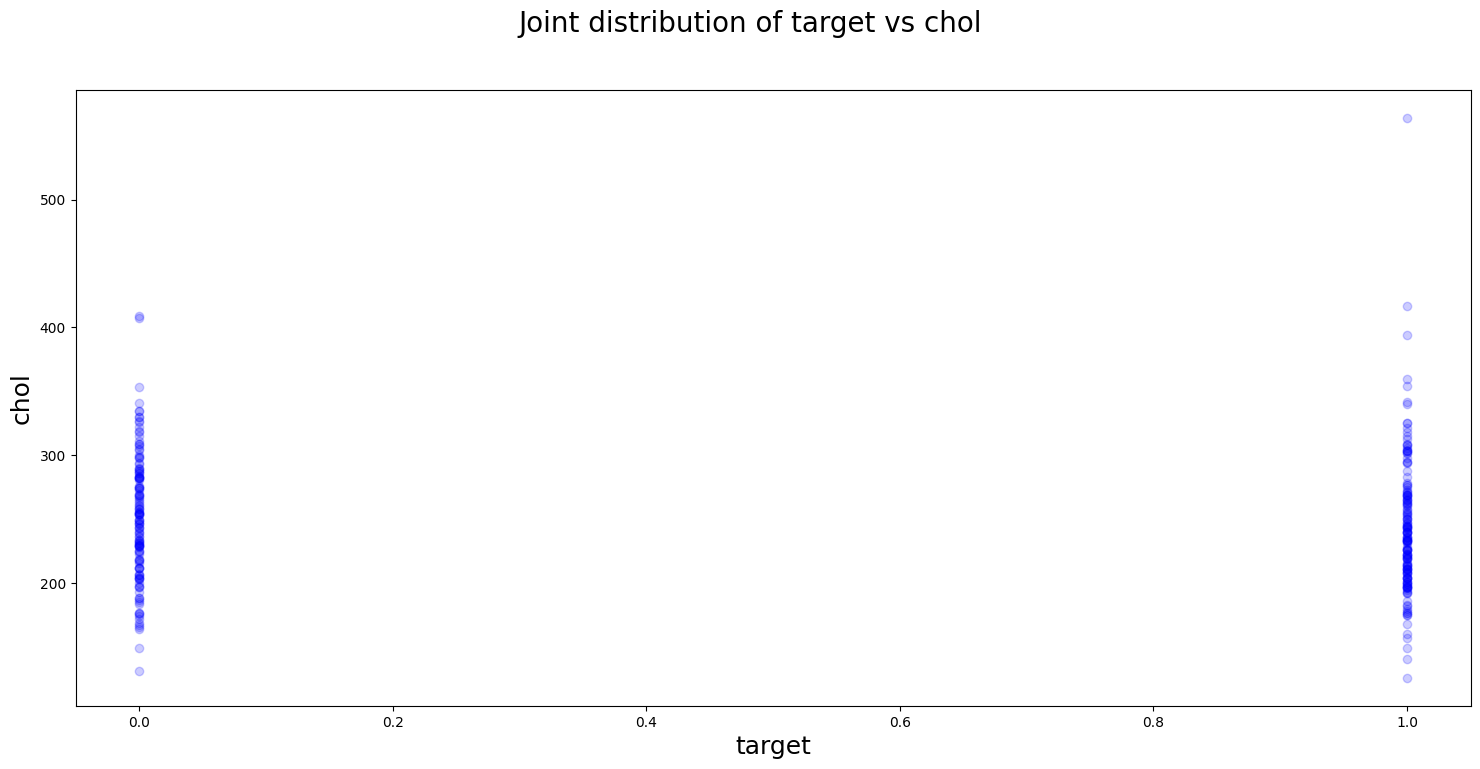

In [69]:
# Here we can see the destribution of cholesterol vs target.
# We can see in the right blue points(1.0) that there are one point that stands on
# top and far away from the rest and that an intersting thing to investigate.
# In our graph we see only 0 and 1 at target cause its only as sick or not.

# Set size for another graph table.
plt.figure(figsize=(18,8))
# Set target as X-axis.
plt.xlabel("target", fontsize=18)
# Set chol(Cholesterol) as Y-axis.
plt.ylabel("chol", fontsize=18)
# Set title of graph.
plt.suptitle("Joint distribution of target vs chol", fontsize= 20)
plt.plot(heart_df.target, heart_df['chol'], 'bo', alpha=0.2)
# Showing the graph.
plt.show()

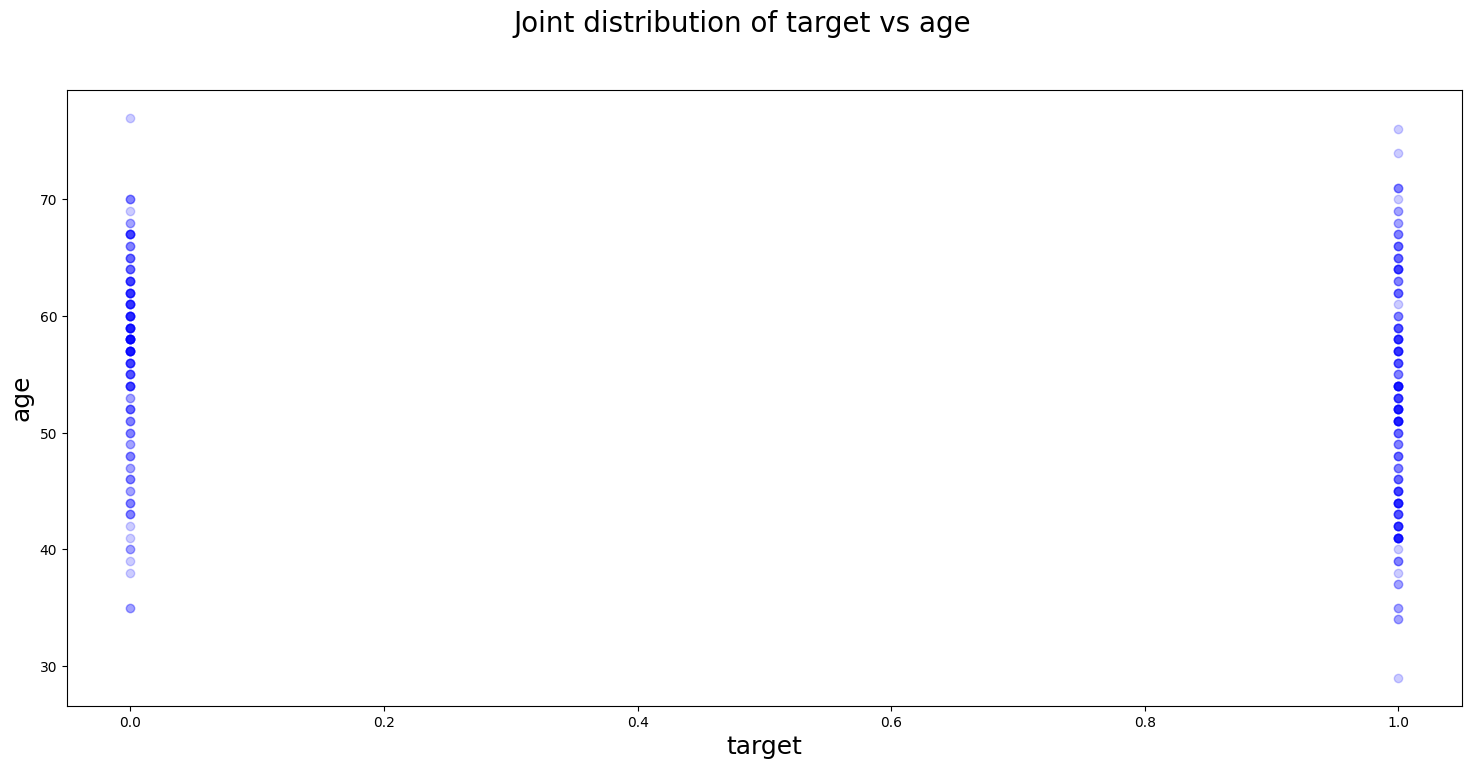

In [78]:
# Here we can see the destribution of age vs target.
# We can see in the left blue points(0.0) that there are one point that stands on
# top and far away from the rest and that an intersting thing to investigate.
# In our graph we see only 0 and 1 at target cause its only as sick or not.

# Set size for another graph table.
plt.figure(figsize=(18,8))
# Set target as X-axis.
plt.xlabel("target", fontsize=18)
# Set age as Y-axis.
plt.ylabel("age", fontsize=18)
# Set title of graph.
plt.suptitle("Joint distribution of target vs age", fontsize= 20)
plt.plot(heart_df.target, heart_df['age'], 'bo', alpha=0.2)
# Showing the graph.
plt.show()

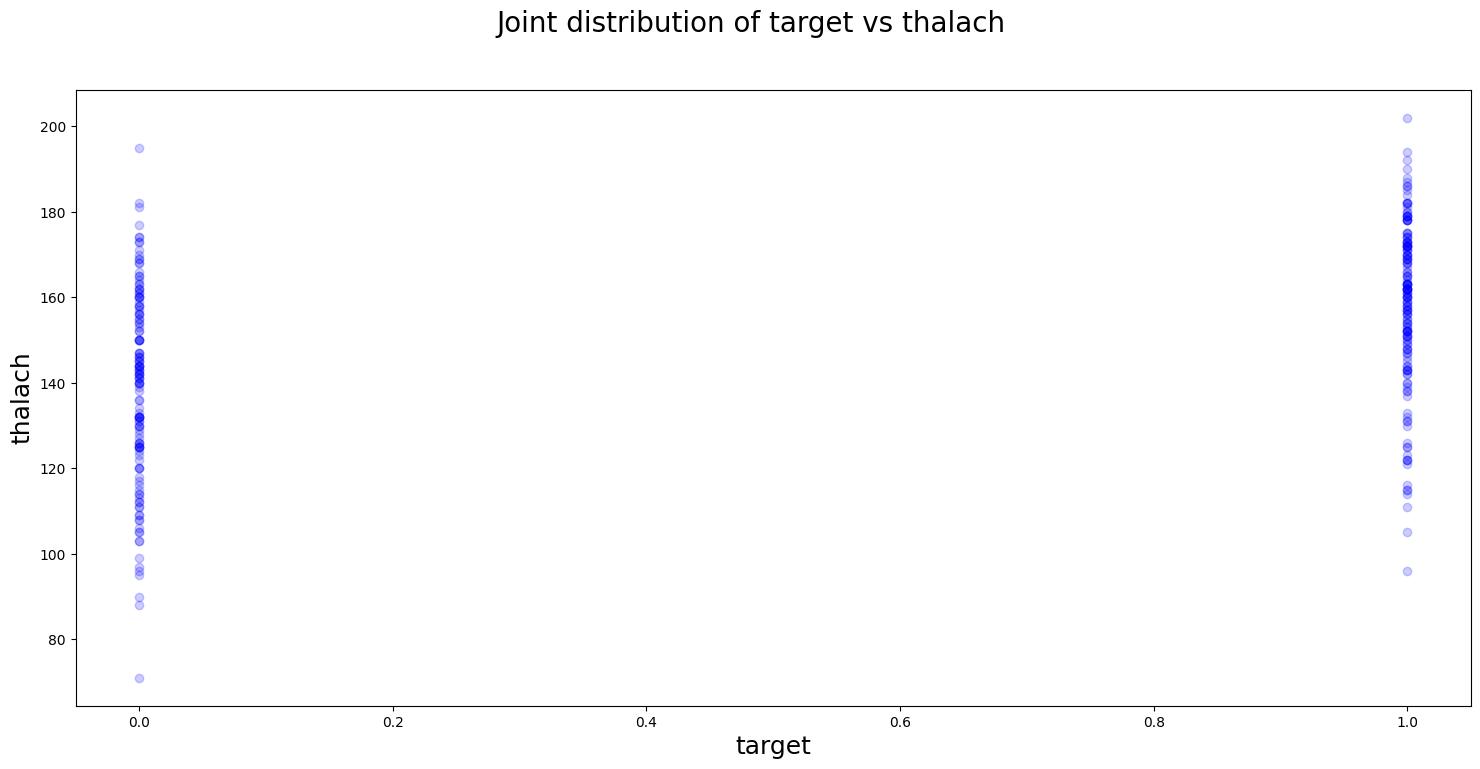

In [80]:
# Here we can see the destribution of thalach vs target.
# We can see in the left blue points(0.0) that there are one point that stands on
# bottom and far away from the rest and that an intersting thing to investigate.
# In our graph we see only 0 and 1 at target cause its only as sick or not.

# Set size for another graph table.
plt.figure(figsize=(18,8))
# Set target as X-axis.
plt.xlabel("target", fontsize=18)
# Set thalach as Y-axis.
plt.ylabel("thalach", fontsize=18)
# Set title of graph.
plt.suptitle("Joint distribution of target vs thalach", fontsize= 20)
plt.plot(heart_df.target, heart_df['thalach'], 'bo', alpha=0.2)
# Showing the graph.
plt.show()

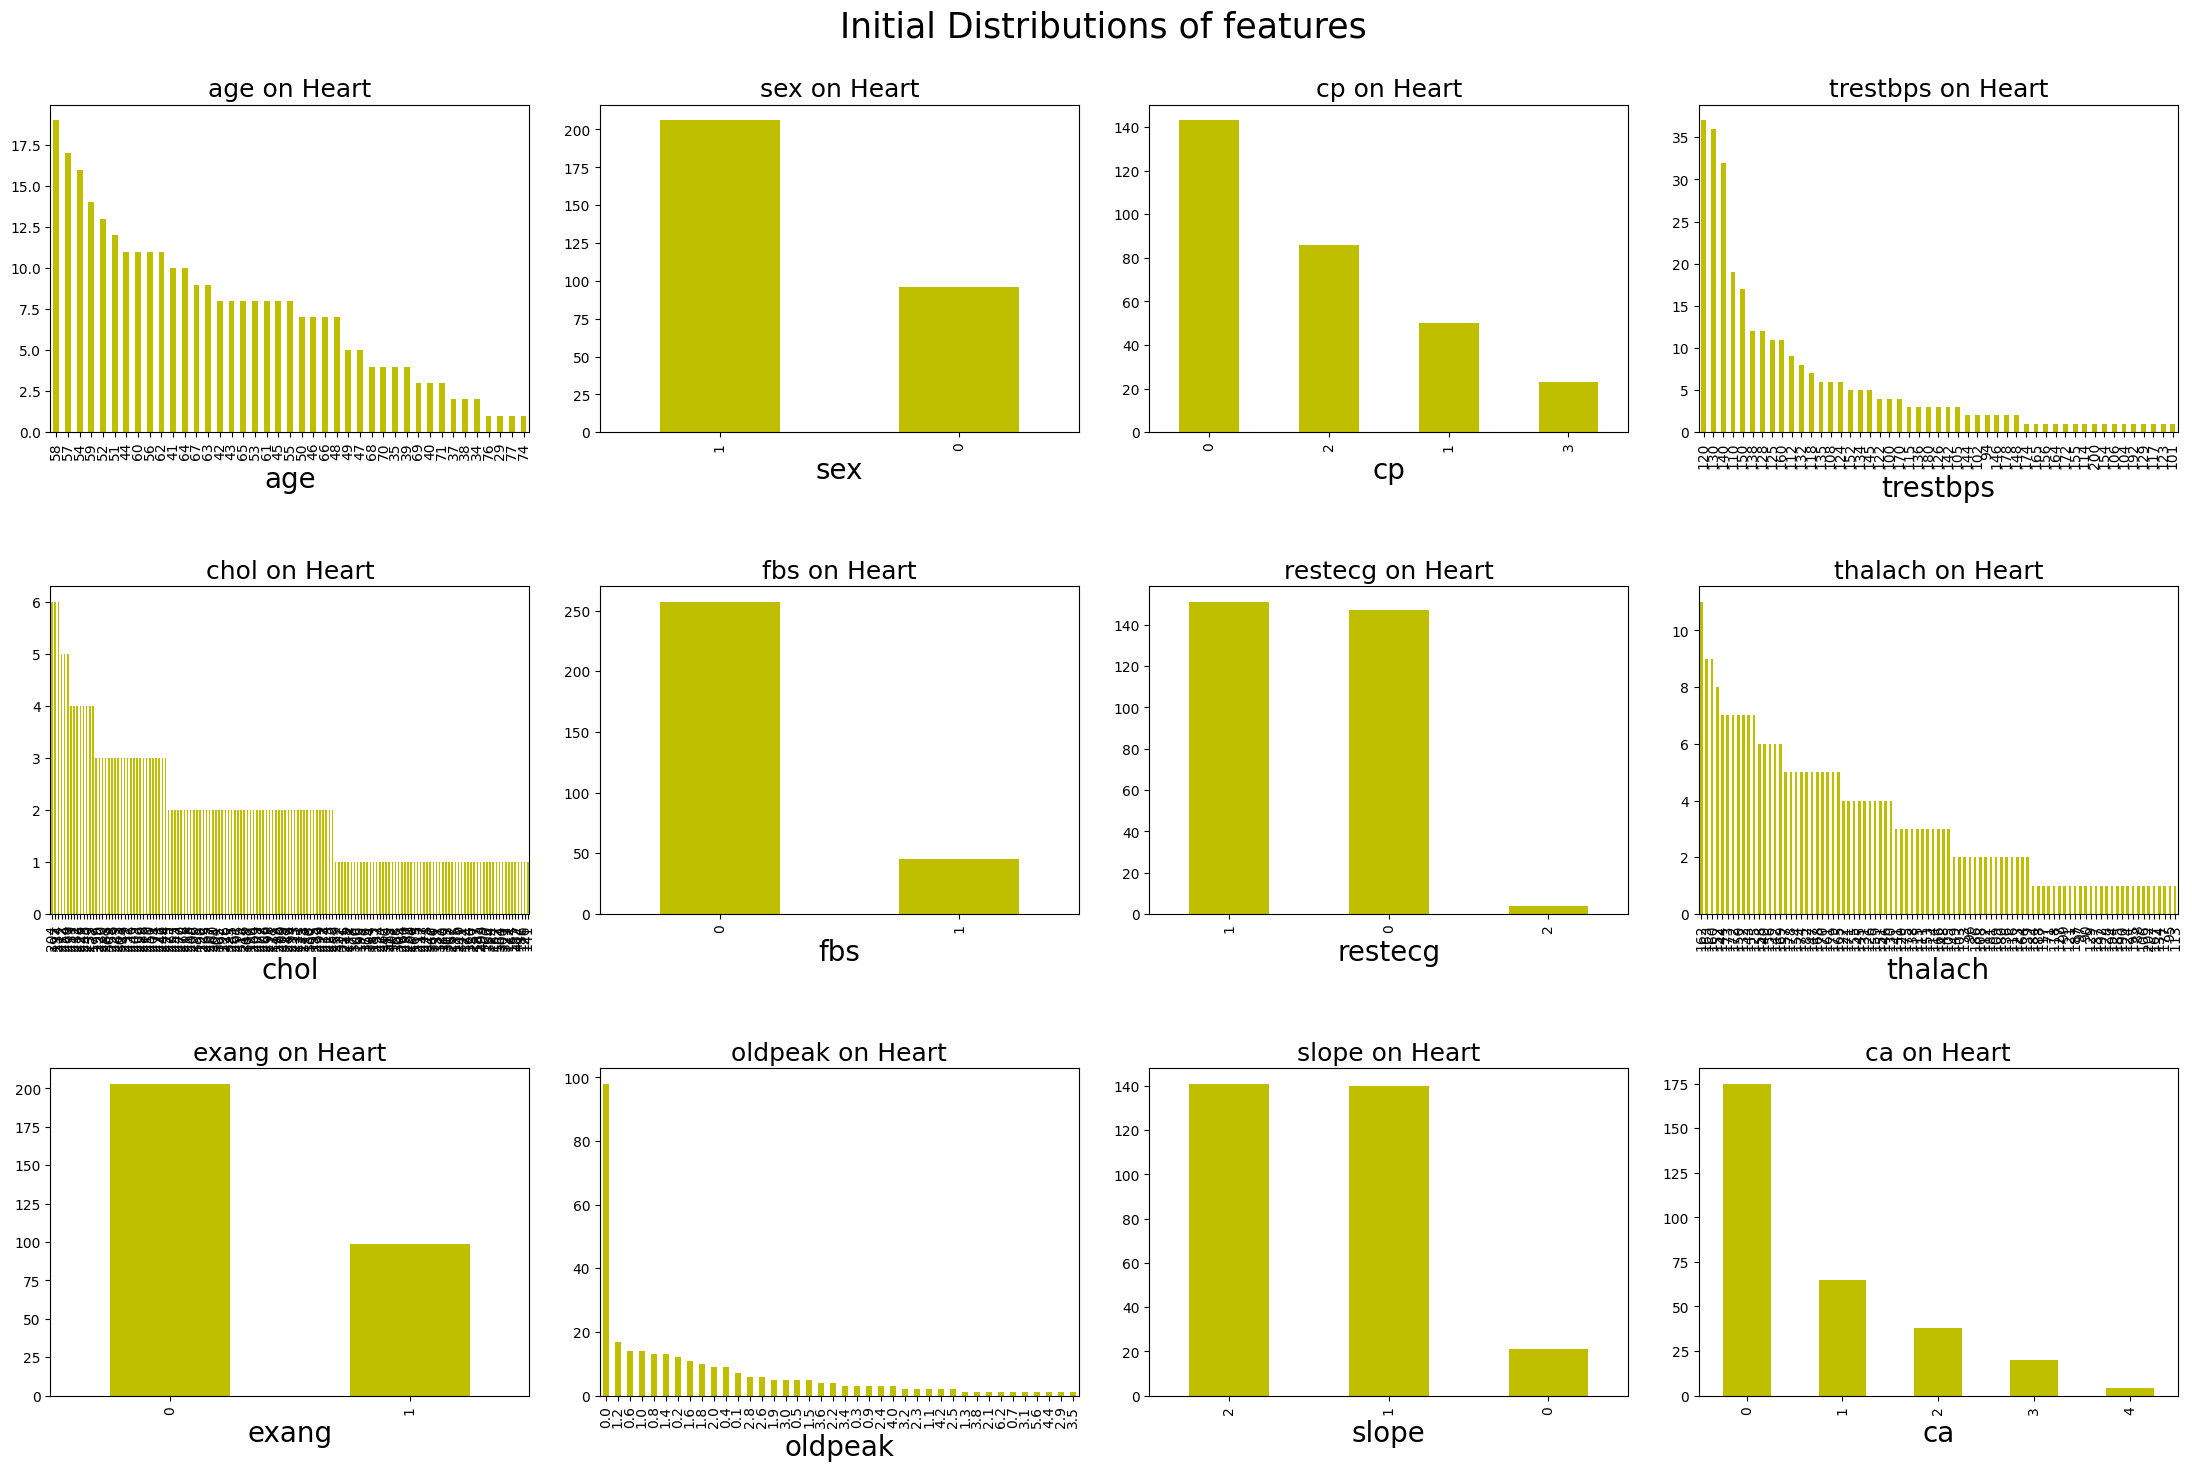

In [75]:
# Define a function to plot the distribution of a column.
def plot_dist(col, ax):
    # Count the values in the column and plot them as a bar chart.
    heart_df[col][heart_df[col].notnull()].value_counts().plot(kind = 'bar', facecolor='y', ax=ax)
    
    # Set the x-label and title of the plot based on the column.
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Heart".format(col), fontsize= 18)
    
    return ax

# Create a figure with a grid of subplots
f, ax = plt.subplots(3,4, figsize = (22,15))
# Adjust the spacing between subplots
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
# Get the list of column names
cols = column_names
# Initialize a counter variable
k = 0
# Iterate over the grid of subplots
for i in range(3):
    for j in range(4):
        # Call the plot_dist function with the current column name and subplot axes
        plot_dist(cols[k], ax[i][j])
        # Increment the counter
        k += 1
# Set the overall title for the figure
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

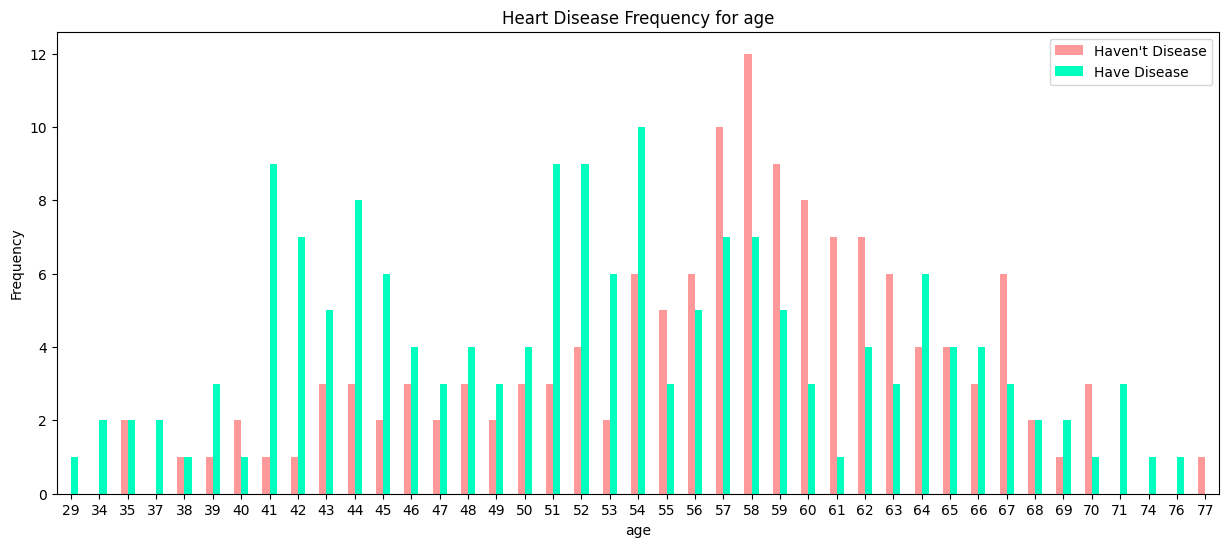

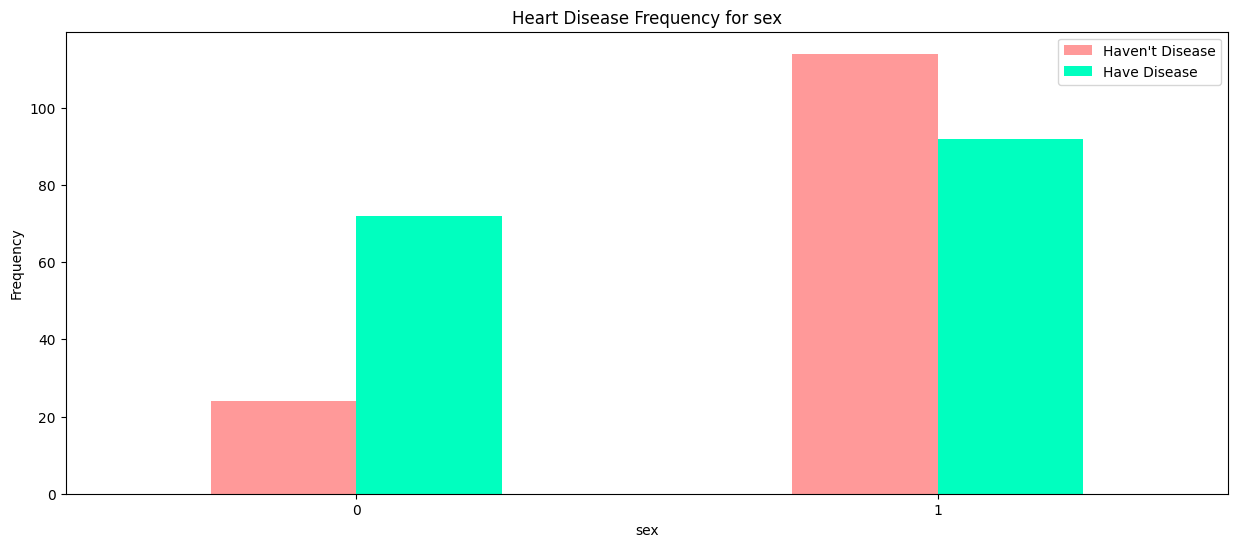

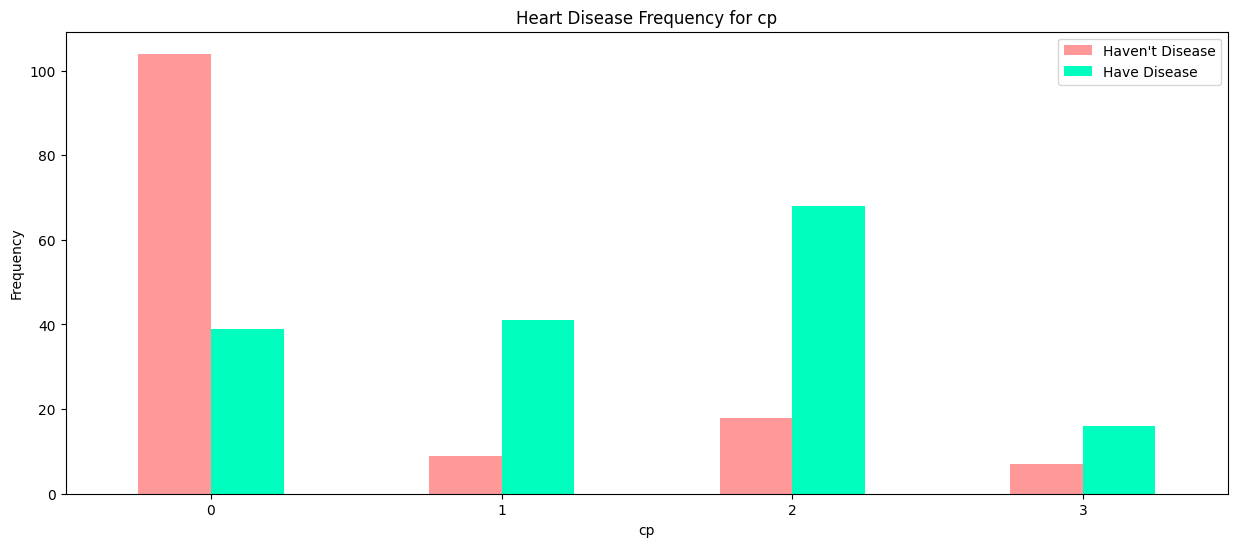

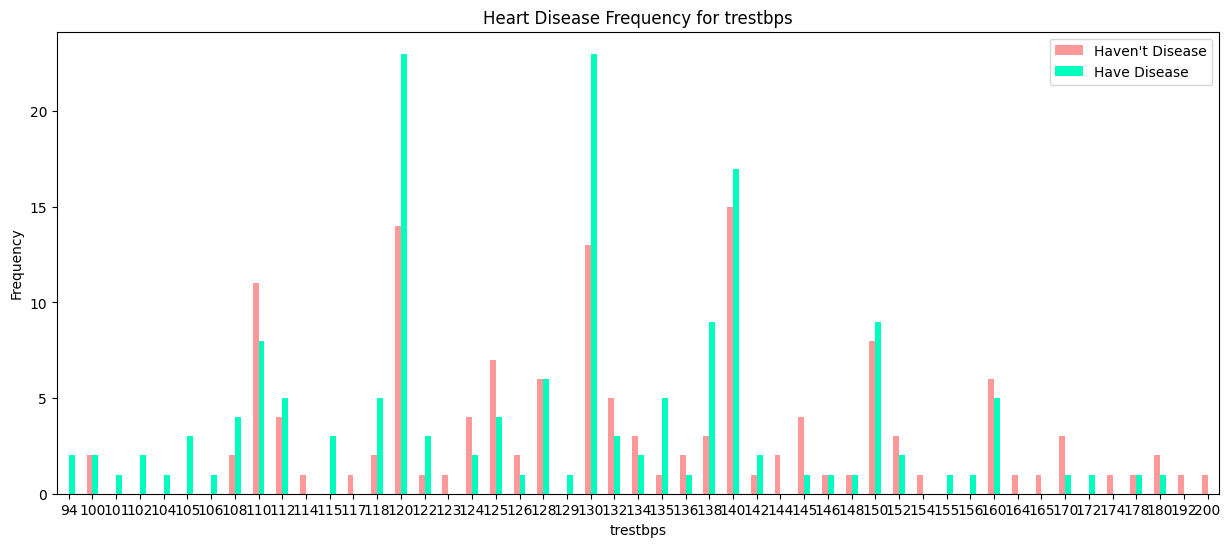

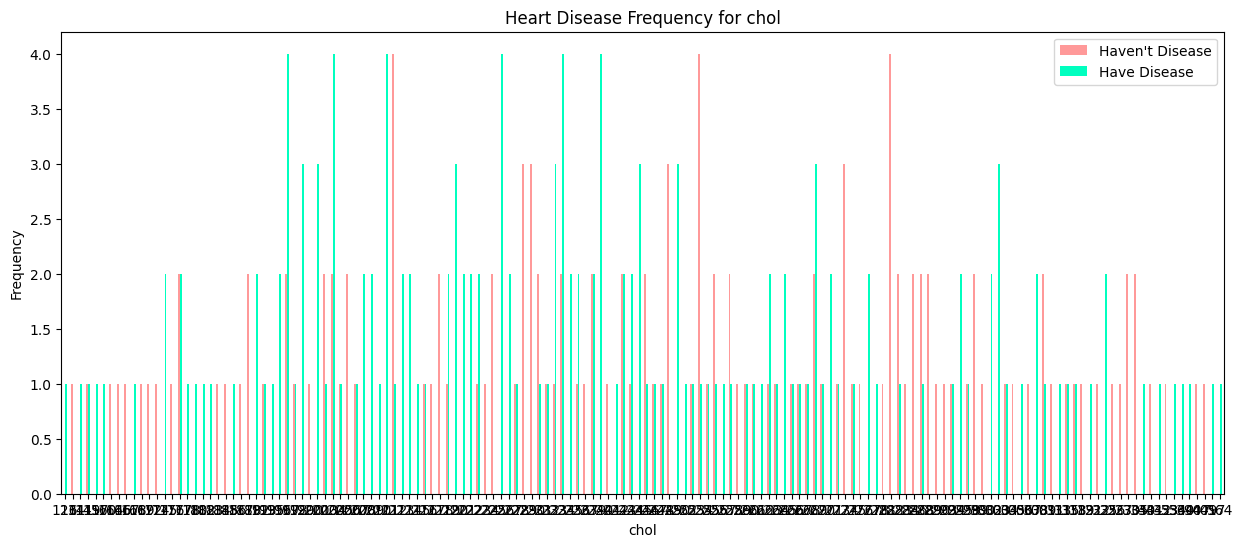

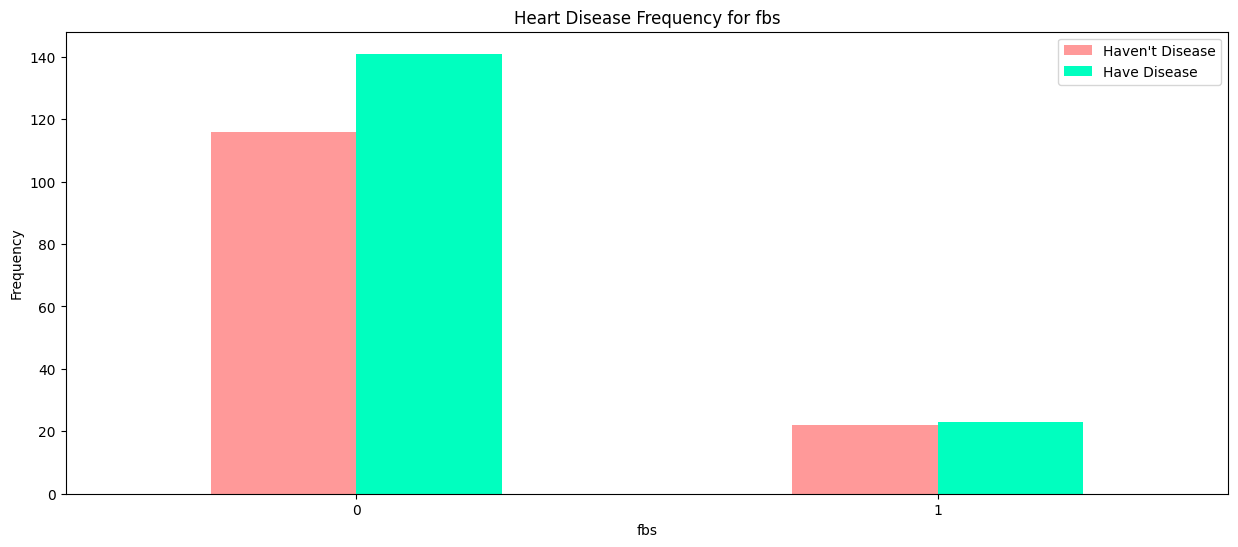

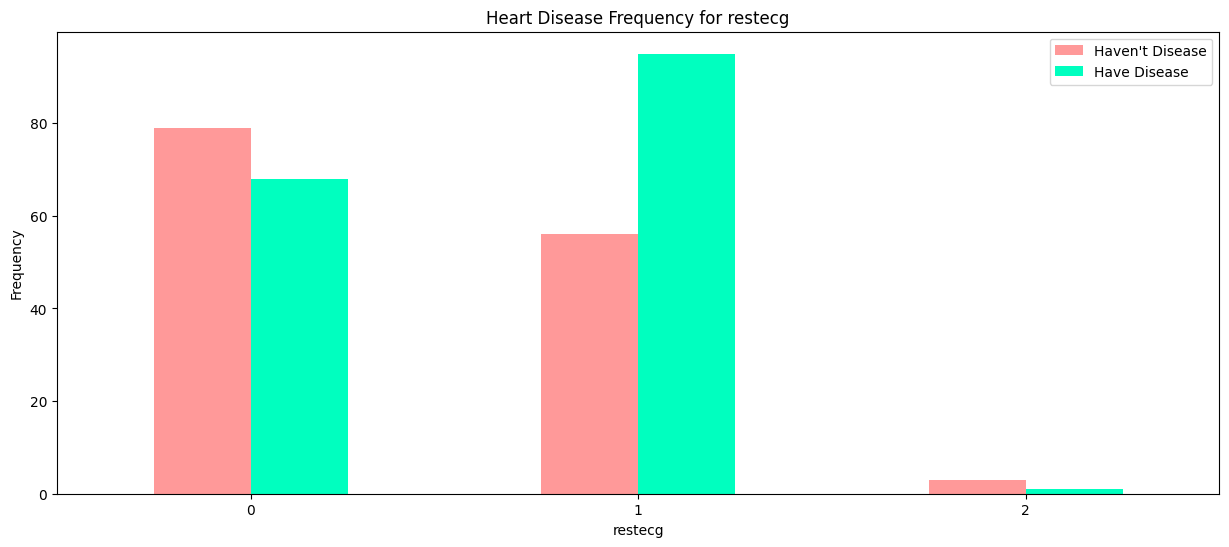

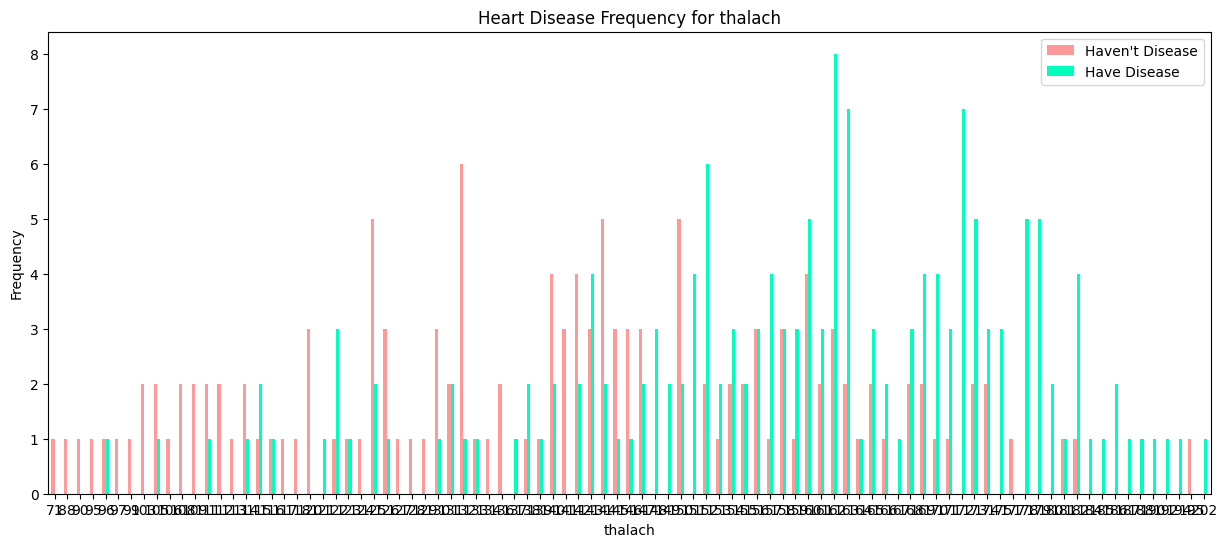

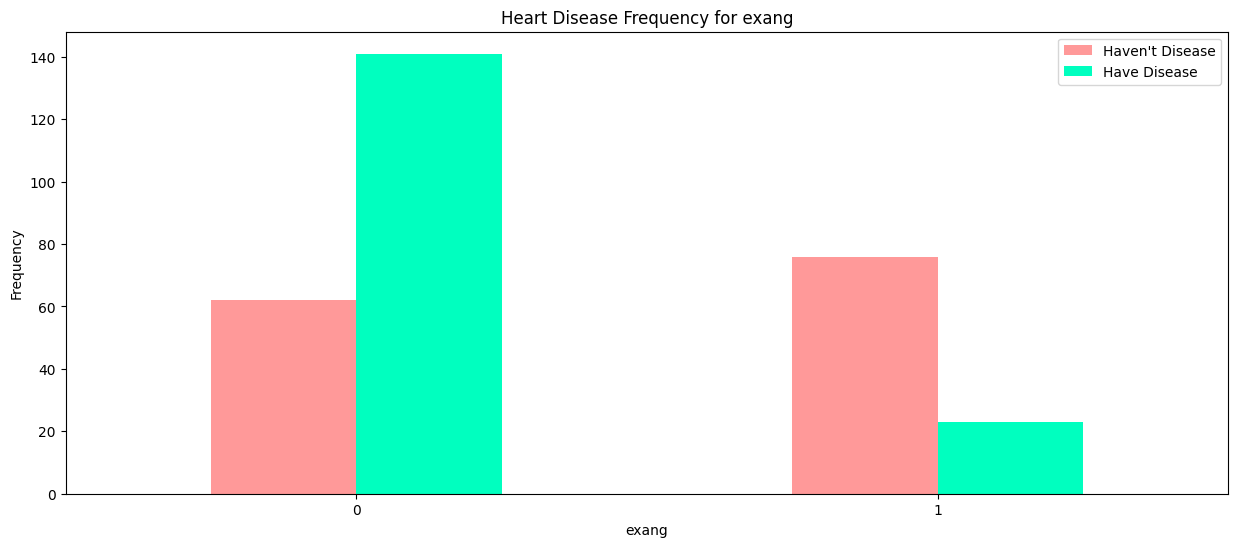

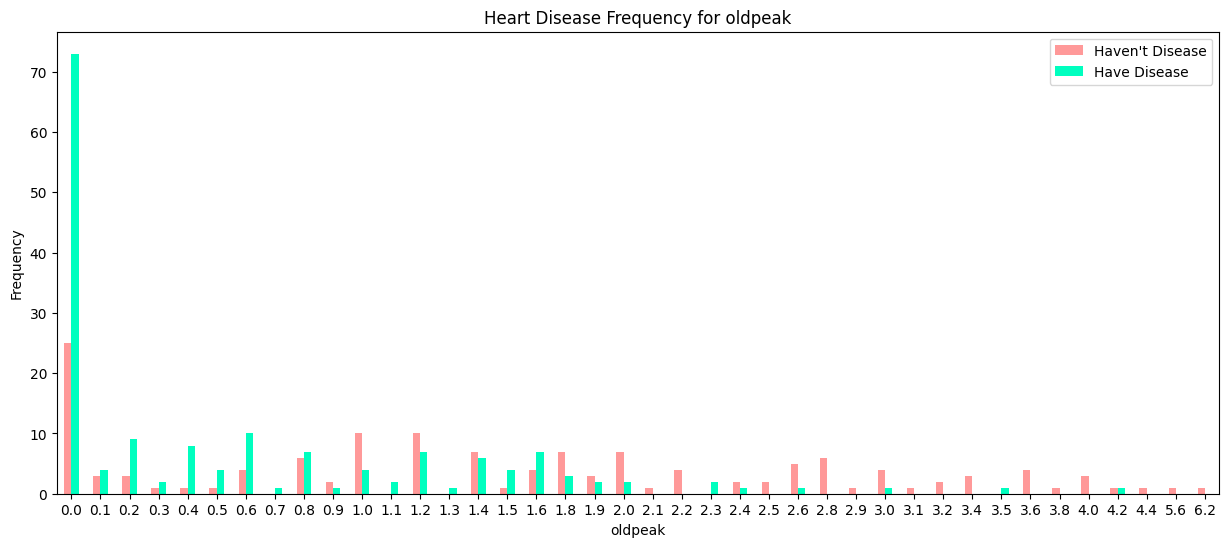

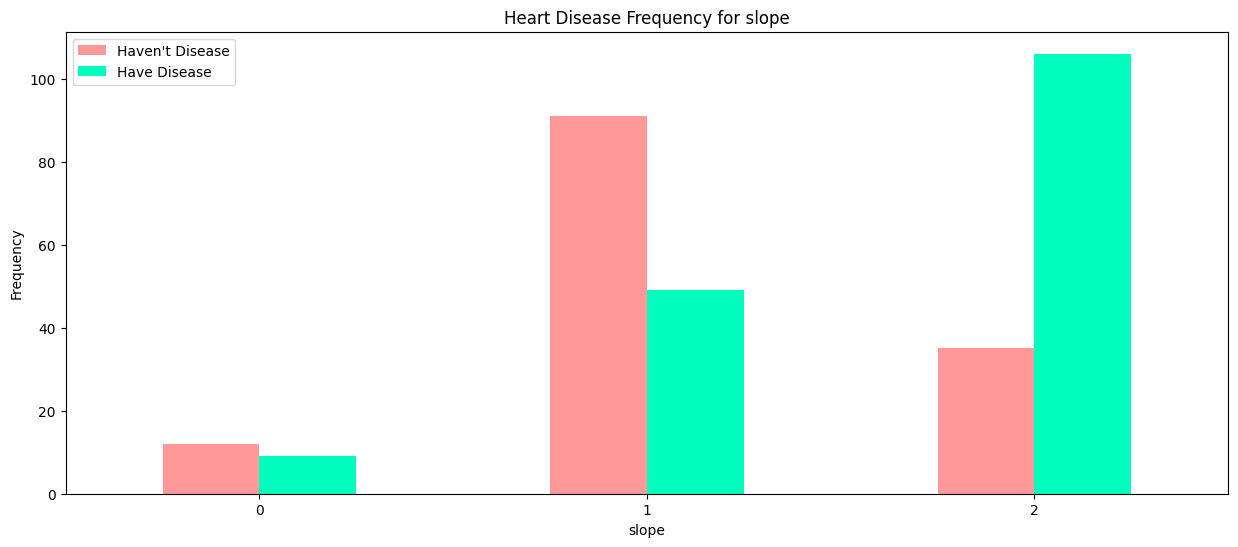

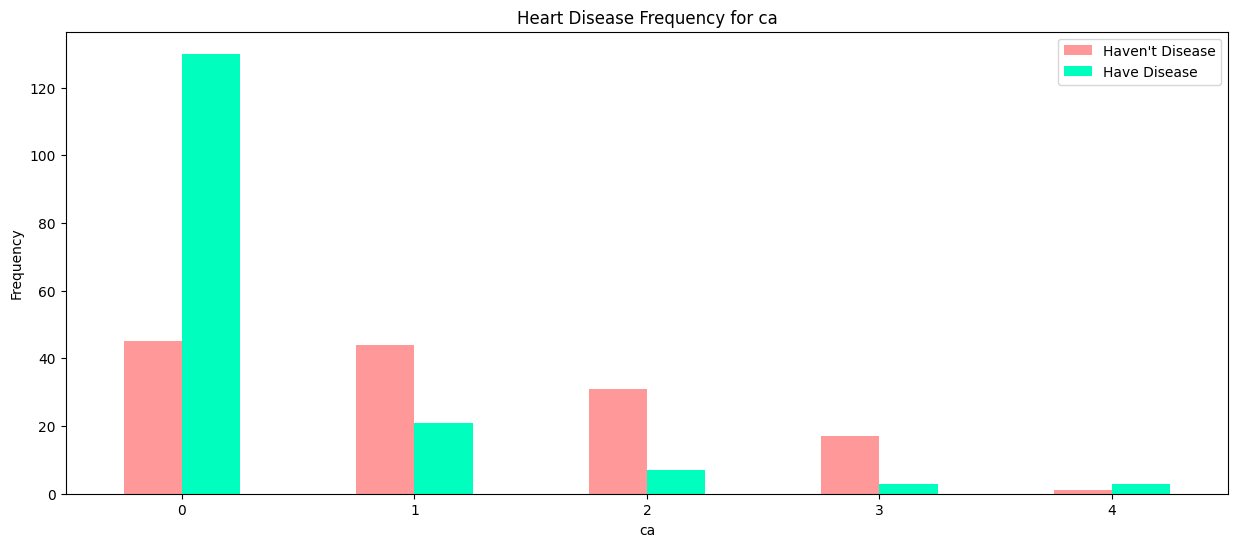

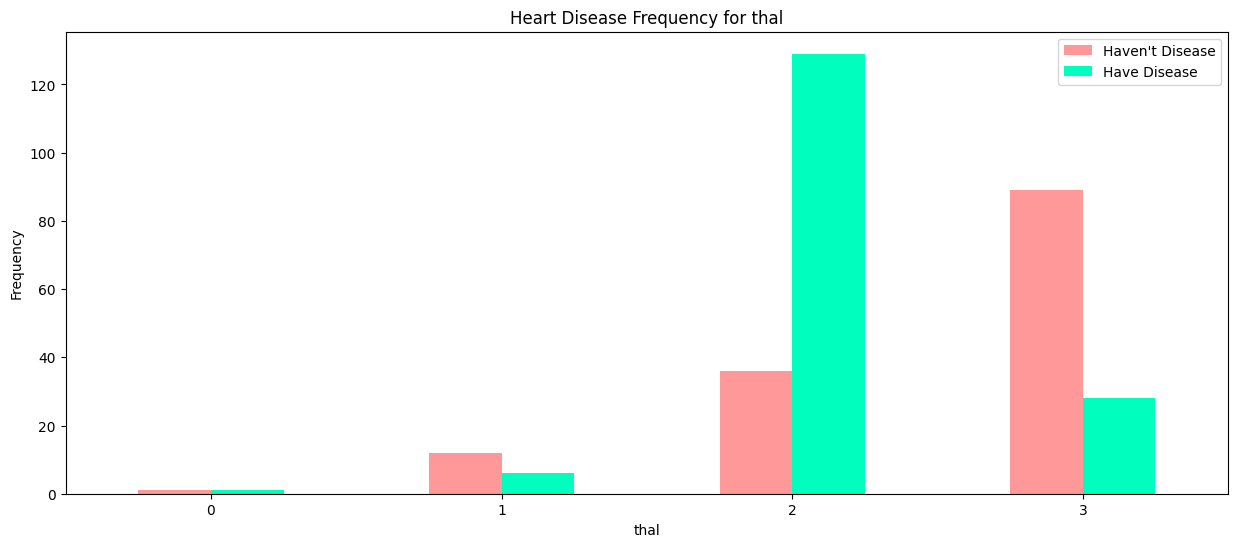

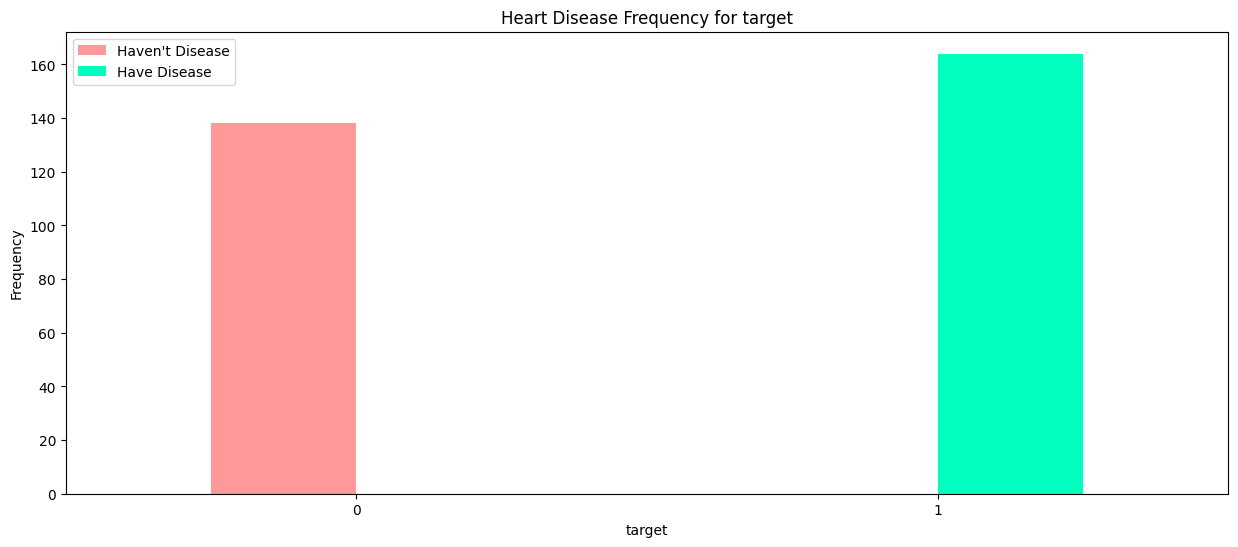

In [81]:
# This code iterates over a list of column names and for each column:
#   # It creates a cross-tabulation between the current column and the 'target' column.
#   # It plots the cross-tabulation as a bar chart with colored bars representing different categories.
#   # It sets the title, x-label, y-label, and legend for the plot.
#   # It rotates the x-axis labels for better readability.
#   # It displays the plot.
# The code provides a quick visual analysis of the frequency of heart disease 
# based on different column variables.
# Each plot represents the distribution of heart disease among different 
# categories or values within the respective columns.

# Iterate over the column names
for name in column_names:
  # Create a cross-tabulation between the current column and the 'target' column
  # Plot the cross-tabulation as a bar chart
  pd.crosstab(heart_df[name],heart_df.target).plot(kind="bar",figsize=(15,6),color=['#ff9999','#00ffbf' ])
  
  # Set the title, x-label, y-label, and legend for the plot
  plt.title('Heart Disease Frequency for {}'.format(name))
  plt.xlabel(name)
  plt.xticks(rotation=0)
  plt.legend(["Haven't Disease", "Have Disease"])
  plt.ylabel('Frequency')
  
  # Display the plot
  plt.show() 


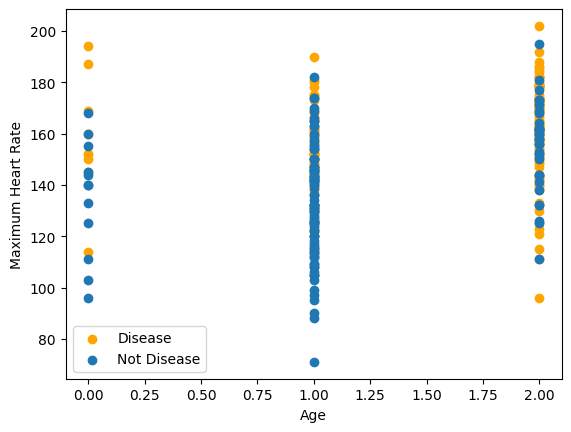

In [83]:
# This code generates a scatter plot to compare the relationship between maximum
# heart rate and age for individuals with and without heart disease.
# It uses orange color for individuals with heart disease and no explicit color 
# for those without. 
# The legend labels differentiate between "Disease" and "Not Disease". 
# The x-axis represents age, while the y-axis represents maximum heart rate. 
# The visualization helps identify patterns or differences 
# in these variables between the two groups.


# Scatter plot to visualize the relationship between maximum heart rate and age based on disease status
plt.scatter(x=heart_df.slope[heart_df.target==1], y=heart_df.thalach[(heart_df.target==1)], c="orange")
plt.scatter(x=heart_df.slope[heart_df.target==0], y=heart_df.thalach[(heart_df.target==0)])
# Set the legend
plt.legend(["Disease", "Not Disease"])
# Set the x-label
plt.xlabel("Age")
# Set the y-label
plt.ylabel("Maximum Heart Rate")
# Display the plot
plt.show()